# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)
* 13 가지의 데이터를 이용해서 주택가격 예측하기 

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import boston_housing

#### 데이터 셋 불러와서 학습 데이터와 테스트 데이터 만들기 
* 학습 데이터 : 404개 - 13가지 
* 테스트 데이터 : 102개 - 1가지 
* 각 데이터는 단위가 다름 - 전처리해서 정규화(Standardization)해야 학습 효과가 좋아진다. 

In [7]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
# 내용 확인하기 
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


#### 데이터 전처리 (정규화)
* 정규화 : 일반적으로 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다. --> 데이터의 분포를 정규분포로 옮기는 역할 수행 
* numpy.ndarray에 대해 평균(mean())과 표준편차(std()) 적용
* 각 항목별로 평균과 표준편차가 구해진다. 
* 테스트 데이터에 대해서는 평균과 표준편차를 구하기 힘든 경우가 있기 때문에 보통은 학습 데이터의 평균과 표준편차 정보를 이용한다. 

In [10]:
# 입력에 사용할 학습 데이터 평균과 표준편차 구하기
x_mean = train_X.mean()
x_std = train_X.std()

# 데이터를 평균으로 빼고 표준편차로 나누기  
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

# 정답 데이터 평균과 표준편차 구하기
y_mean = train_Y.mean()
y_std = train_Y.std()

# 데이터를 평균으로 빼고 표준편차로 나누기  
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

# 데이터가 정규분포로 이루어짐 
print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


#### 시퀀스로 구성된 회귀 모델 생성
* 4개의 레이어로 구성 --> 레이어의 수와 은닉층의 뉴런의 수를 늘리면 모델의 표현력이 좋아지기 때문에 더 복잡한 내용을 학습시킬 수 있다. 
* 첫번째 레이어는 13개의 항목과 52개의 뉴런으로 학습 수행 --> 학습에 사용되는 파라미터는 13 X 52 + 1 X 52 = 728 이 된다. 
* 두번째 레이어는 39개의 뉴런을 사용하는데 앞 레이어서 52개의 뉴런 정보와 b가 넘어온다. --> 학습에 사용되는 파리미터의 갯수는 52 X 39 + 1 X 39 = 2067이 된다. 
* 나머지 파라미터들은 위의 방법과 동일한 방식으로 계산된다. 

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

#### 모델 학습
* validation_split : 훈련 데이터의 25% 정도를 검증 데이터로 사용 

In [19]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#history.history    # 학습된 내용 확인 

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 125us/sample - loss: 0.5988 - val_loss: 0.8832
Epoch 2/25
303/303 [==============================] - 0s 92us/sample - loss: 0.5051 - val_loss: 0.8701
Epoch 3/25
303/303 [==============================] - 0s 95us/sample - loss: 0.4645 - val_loss: 0.8693
Epoch 4/25
303/303 [==============================] - 0s 95us/sample - loss: 0.4857 - val_loss: 0.7424
Epoch 5/25
303/303 [==============================] - 0s 92us/sample - loss: 0.4362 - val_loss: 0.6907
Epoch 6/25
303/303 [==============================] - 0s 92us/sample - loss: 0.4788 - val_loss: 0.7323
Epoch 7/25
303/303 [==============================] - 0s 92us/sample - loss: 0.4442 - val_loss: 0.8116
Epoch 8/25
303/303 [==============================] - 0s 92us/sample - loss: 0.4528 - val_loss: 0.6483
Epoch 9/25
303/303 [==============================] - 0s 92us/sample - loss: 0.4616 - val_loss: 0.7119
Epoch 10/25
303/303 [=====

{'loss': [0.5988256112970535,
  0.5051413489253608,
  0.46448482007476755,
  0.4856546953959827,
  0.43618202111115156,
  0.47877333797637384,
  0.44422505604158535,
  0.4527577045727091,
  0.4616499982356238,
  0.4040765001042054,
  0.40428913554342666,
  0.42099264834580247,
  0.40201629388450394,
  0.41879858533934794,
  0.4108154714697658,
  0.4804551685997362,
  0.533995977575236,
  0.4502628316285193,
  0.4866788884003957,
  0.4706024406570019,
  0.4151974664662931,
  0.373813255588607,
  0.3931048749992163,
  0.42049416732473344,
  0.5104311010231672],
 'val_loss': [0.8832101048809466,
  0.870111549107155,
  0.8692812397338376,
  0.742446056244397,
  0.6906513385843522,
  0.7322889901328795,
  0.811649709571116,
  0.6483221754874333,
  0.7119043853760946,
  0.7027992275681826,
  0.7815154418349266,
  0.7025666800465914,
  0.657928266295112,
  0.6258278896312902,
  0.6559370219117344,
  0.7589781101387326,
  0.9102261874935414,
  0.6867482825966165,
  0.9455415174217507,
  0.6493

#### 회귀 모델 학습 결과 그래프

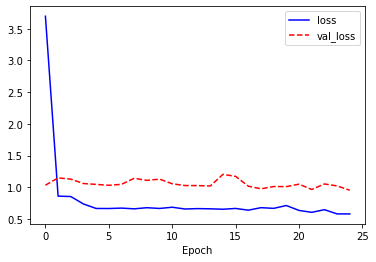

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 회귀모델 평가(evaluation)
* 실제 테스트 데이터를 입력해서 모델을 평가한다.

In [17]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 293us/sample - loss: 0.7110


0.7110450197668636